<a href="https://colab.research.google.com/github/manojjha/Data_Science_Code/blob/master/happy-or-sad-imoji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-10-25 17:32:27--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   122MB/s    in 1.2s    

2019-10-25 17:32:28 (122 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [7]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip \
    -O /tmp/happy-or-sad.zip

--2019-10-25 17:37:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 2607:f8b0:400e:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2670333 (2.5M) [application/zip]
Saving to: ‘/tmp/happy-or-sad.zip’

/tmp/happy-or-sad.z 100%[===================>]   2.55M  --.-KB/s    in 0.02s   

2019-10-25 17:37:40 (122 MB/s) - ‘/tmp/happy-or-sad.zip’ saved [2670333/2670333]



In [0]:
import os
import zipfile

local_zip = '/tmp/happy-or-sad.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/happy-or-sad')
zip_ref.close()

In [0]:
train_happy_dir = os.path.join('/tmp/happy-or-sad/happy')

train_sad_dir = os.path.join('/tmp/happy-or-sad/sad')

In [16]:
train_happy_names = os.listdir(train_happy_dir)
print(train_happy_names[:10])

train_sad_names = os.listdir(train_sad_dir)
print(train_sad_names[:10])

['happy1-19.png', 'happy1-08.png', 'happy2-08.png', 'happy2-07.png', 'happy1-02.png', 'happy2-04.png', 'happy2-16.png', 'happy1-12.png', 'happy2-13.png', 'happy1-18.png']
['sad2-12.png', 'sad2-14.png', 'sad2-17.png', 'sad2-10.png', 'sad1-17.png', 'sad1-16.png', 'sad2-11.png', 'sad2-07.png', 'sad1-03.png', 'sad1-01.png']


In [17]:
print('total training happy images: ',len(os.listdir(train_happy_dir)))
print('total training sad images: ', len(os.listdir(train_sad_dir)) )

total training happy images:  40
total training sad images:  40


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

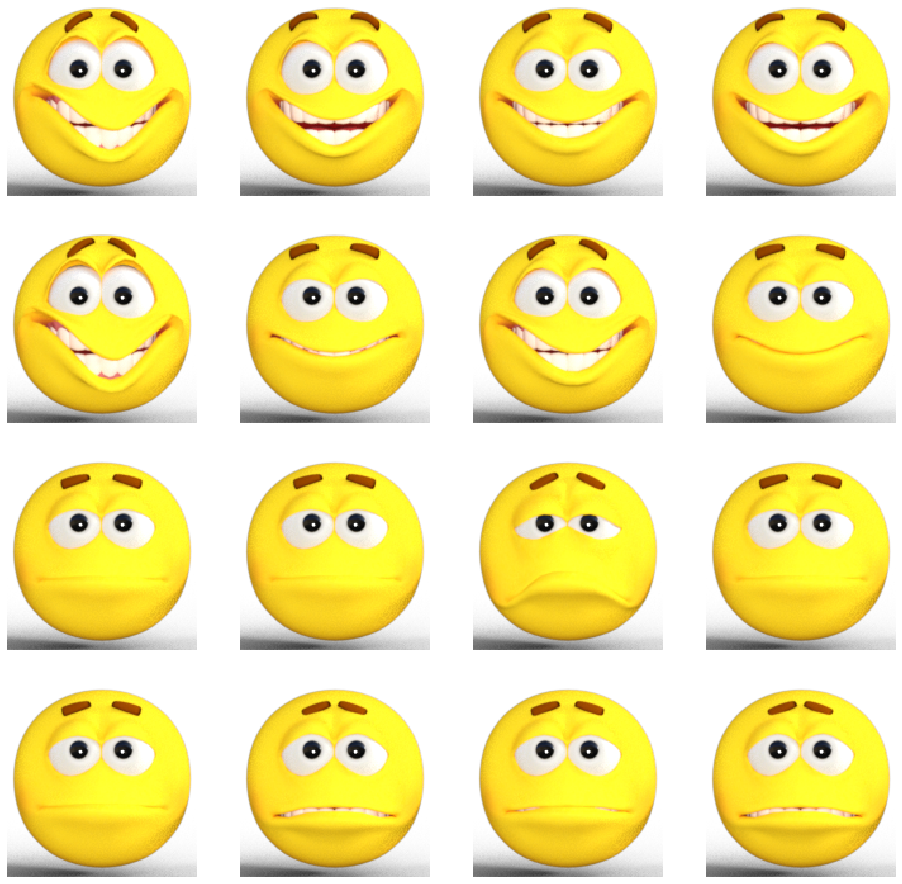

In [20]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_happy_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_sad_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_happy_pix+next_sad_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [21]:
import tensorflow as tf


In [22]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(1, activation='sigmoid')    


])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [24]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc']
              )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
    '/tmp/happy-or-sad/',
    target_size=(150,150),
    batch_size = 128,
    class_mode='binary'
)


Found 80 images belonging to 2 classes.


In [28]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1

)

Epoch 1/15
8/8 [==============================] - 40s 5s/step - loss: 1.5070 - acc: 0.5312
Epoch 2/15
8/8 [==============================] - 39s 5s/step - loss: 0.5920 - acc: 0.6375
Epoch 3/15
8/8 [==============================] - 37s 5s/step - loss: 0.2815 - acc: 0.8844
Epoch 4/15
8/8 [==============================] - 37s 5s/step - loss: 0.1934 - acc: 0.9234
Epoch 5/15
8/8 [==============================] - 39s 5s/step - loss: 0.1088 - acc: 0.9703
Epoch 6/15
8/8 [==============================] - 39s 5s/step - loss: 0.0650 - acc: 0.9688
Epoch 7/15
8/8 [==============================] - 37s 5s/step - loss: 0.0819 - acc: 0.9797
Epoch 8/15
8/8 [==============================] - 36s 5s/step - loss: 0.0101 - acc: 1.0000
Epoch 9/15
8/8 [==============================] - 37s 5s/step - loss: 0.0036 - acc: 1.0000
Epoch 10/15
8/8 [==============================] - 37s 5s/step - loss: 0.0020 - acc: 1.0000
Epoch 11/15
8/8 [==============================] - 37s 5s/step - loss: 7.5179e-04 - acc: 